In [379]:
import matplotlib.pyplot as plt
import pandas as pd
import pycountry
import seaborn as sns

data_2021_2023 = pd.read_csv('Data/salaries.csv')
data_2017_2020 = pd.read_csv('Data/2019_Data_Professional_Salary_Survey_Responses.csv')

In [380]:
data_2021_2023_copy = data_2021_2023.copy()
data_2021_2023_copy = data_2021_2023_copy.drop(
    ["company_size", "remote_ratio", "salary_currency", "company_size", "salary"], axis=1)
data_2021_2023_copy.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location
0,2023,SE,FT,Machine Learning Engineer,70179,IT,US
1,2023,MI,FT,BI Developer,110000,US,US
2,2023,MI,FT,BI Developer,75000,US,US
3,2023,MI,FT,Data Analyst,46426,SI,SI
4,2023,MI,FT,Data Analyst,38868,SI,SI


In [381]:
  #copy de dataframe 2017-2020
data_2017_2020_copy = data_2017_2020.copy()

In [382]:
data_2017_2020_copy = data_2017_2020_copy.drop(['Timestamp', 'PostalCode',
                                                'PrimaryDatabase', 'YearsWithThisDatabase', 'OtherDatabases',
                                                'ManageStaff', 'YearsWithThisTypeOfJob',
                                                'HowManyCompanies', 'OtherPeopleOnYourTeam', 'CompanyEmployeesOverall',
                                                'DatabaseServers', 'Education', 'EducationIsComputerRelated',
                                                'Certifications', 'HoursWorkedPerWeek', 'TelecommuteDaysPerWeek',
                                                'PopulationOfLargestCityWithin20Miles',
                                                'LookingForAnotherJob', 'CareerPlansThisYear', 'Gender',
                                                'OtherJobDuties', 'KindsOfTasksPerformed', 'Counter',
                                                'EmploymentSector'], axis=1)
data_2017_2020_copy

,Survey Year,SalaryUSD,Country,EmploymentStatus,JobTitle
0,2017,200000,United States,Full time employee,DBA
1,2017,61515,United Kingdom,Full time employee,DBA
2,2017,95000,Germany,Full time employee,Other
3,2017,56000,United Kingdom,Full time employee,DBA
4,2017,35000,France,Full time employee of a consulting/contracting...,DBA
...,...,...,...,...,...
6888,2019,32000,Hungary,Full time employee,DBA (General - splits time evenly between writ...
6889,2019,32000,Hungary,Full time employee,DBA (General - splits time evenly between writ...
6890,2019,40000,Portugal,Full time employee of a consulting/contracting...,"Developer: App code (C#, JS, etc)"
6891,2019,130000,United States,Full time employee of a consulting/contracting...,DBA (General - splits time evenly between writ...


In [383]:
data_2017_2020_copy['EmploymentStatus'] = data_2017_2020_copy['EmploymentStatus'].copy()
data_2017_2020_copy.loc[:, 'EmploymentStatus'] = data_2017_2020_copy['EmploymentStatus'].replace('Full time employee',
                                                                                                 'Full time').replace(
    'Full time employee of a consulting/contracting company', 'Full time').replace(
    'Independent or freelancer or company owner', 'Freelance').replace(
    'Independent consultant, contractor, freelancer,  or company owner', 'Contract')

In [384]:
data_2021_2023_copy['employment_type'] = data_2021_2023_copy['employment_type'].copy()
data_2021_2023_copy.loc[:, 'employment_type'] = data_2021_2023_copy['employment_type'].replace('FT',
                                                                                               'Full time').replace(
    'CT', 'Contract').replace('PT', 'Part time').replace('FL', 'Freelance')

In [385]:
def get_country_name(initial):
    try:
        country = pycountry.countries.get(alpha_2=initial)
        return country.name
    except AttributeError:
        return initial

In [386]:
data_2021_2023_copy['company_location'] = data_2021_2023_copy['company_location'].apply(get_country_name)
data_2021_2023_copy.rename(columns={'company_location': 'Country'}, inplace=True)

data_2021_2023_copy['employee_residence'] = data_2021_2023_copy['employee_residence'].apply(get_country_name)
data_2021_2023_copy.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,Country
0,2023,SE,Full time,Machine Learning Engineer,70179,Italy,United States
1,2023,MI,Full time,BI Developer,110000,United States,United States
2,2023,MI,Full time,BI Developer,75000,United States,United States
3,2023,MI,Full time,Data Analyst,46426,Slovenia,Slovenia
4,2023,MI,Full time,Data Analyst,38868,Slovenia,Slovenia


In [387]:
data_2021_2023_copy['experience_level'] = data_2021_2023_copy['experience_level'] \
    .replace('EN', 'Junior') \
    .replace('MI', 'Internmediate') \
    .replace('SE', 'Expert') \
    .replace('EX', 'Director')
data_2021_2023_copy

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,Country
0,2023,Expert,Full time,Machine Learning Engineer,70179,Italy,United States
1,2023,Internmediate,Full time,BI Developer,110000,United States,United States
2,2023,Internmediate,Full time,BI Developer,75000,United States,United States
3,2023,Internmediate,Full time,Data Analyst,46426,Slovenia,Slovenia
4,2023,Internmediate,Full time,Data Analyst,38868,Slovenia,Slovenia
...,...,...,...,...,...,...,...
8097,2020,Expert,Full time,Data Scientist,412000,United States,United States
8098,2021,Internmediate,Full time,Principal Data Scientist,151000,United States,United States
8099,2020,Junior,Full time,Data Scientist,105000,United States,United States
8100,2020,Junior,Contract,Business Data Analyst,100000,United States,United States


In [388]:
#cleaning dtype
data_2017_2020_copy = data_2017_2020_copy.copy()
data_2017_2020_copy['SalaryUSD'] = data_2017_2020_copy['SalaryUSD'].apply(lambda x: x.replace("$", ""))
data_2017_2020_copy['SalaryUSD'] = data_2017_2020_copy['SalaryUSD'].apply(lambda x: x.replace(",", ""))
data_2017_2020_copy['SalaryUSD'] = data_2017_2020_copy['SalaryUSD'].apply(lambda x: x.replace(" ", ""))
data_2017_2020_copy['SalaryUSD'] = data_2017_2020_copy['SalaryUSD'].apply(lambda x: x.replace(".", ""))
data_2017_2020_copy['SalaryUSD'] = data_2017_2020_copy['SalaryUSD'].apply(lambda x: x.replace(".00", ""))

In [389]:
# convert object in int
data_2017_2020_copy['SalaryUSD'] = data_2017_2020_copy['SalaryUSD'].astype(int).copy()
data_2017_2020_copy['SalaryUSD'].dtypes

dtype('int32')

In [390]:
data_2017_2020_copy.loc[:, 'JobTitle'].unique()

array(['DBA', 'Other', 'Developer: App code (C#, JS, etc)', 'Engineer',
       'Developer: T-SQL',
       'Developer: Business Intelligence (SSRS, PowerBI, etc)',
       'Architect', 'Analyst', 'Manager', 'Data Scientist',
       'Principal database engineer', 'DevOps, Sr Software Engineer DBA',
       'Technician ', 'Database Specialist', 'Consultant',
       'Systems Administrator', 'Sales', 'DBA / BI Developer',
       'Sr Consultant ', 'Analytics consultant',
       'DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)',
       'DBA (Development Focus - tunes queries, indexes, does deployments)',
       'DBA (Production Focus - build & troubleshoot servers, HA/DR)'],
      dtype=object)

In [391]:
data_2017_2020_copy.loc[:, "JobTitle"] = (data_2017_2020_copy.loc[:, "JobTitle"]
                                          .replace("Engineer", "Data Engineer") \
                                          .replace("Analyst", "Data Analyst") \
                                          .replace("Architect", "Data Architect") \
                                          .replace("Manager", "Data Manager") \
                                          .replace("Developer: Business Intelligence (SSRS, PowerBI, etc)",
                                                   "BI Developer"))
data_2017_2020_copy.loc[:, "JobTitle"].unique()

array(['DBA', 'Other', 'Developer: App code (C#, JS, etc)',
       'Data Engineer', 'Developer: T-SQL', 'BI Developer',
       'Data Architect', 'Data Analyst', 'Data Manager', 'Data Scientist',
       'Principal database engineer', 'DevOps, Sr Software Engineer DBA',
       'Technician ', 'Database Specialist', 'Consultant',
       'Systems Administrator', 'Sales', 'DBA / BI Developer',
       'Sr Consultant ', 'Analytics consultant',
       'DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)',
       'DBA (Development Focus - tunes queries, indexes, does deployments)',
       'DBA (Production Focus - build & troubleshoot servers, HA/DR)'],
      dtype=object)

In [392]:
retained_values = ["Data Engineer", "BI Developer", "Data Architect", "Data Analyst", "Data Manager", "Data Scientist"]

In [393]:
data_2017_2020_copy.loc[:, 'JobTitle'] = data_2017_2020_copy.loc[:, 'JobTitle'].apply(
    lambda x: x if x in retained_values else 'Other')

In [394]:
data_2017_2020_copy.loc[:, 'JobTitle'].unique()

array(['Other', 'Data Engineer', 'BI Developer', 'Data Architect',
       'Data Analyst', 'Data Manager', 'Data Scientist'], dtype=object)

In [395]:
data_2021_2023_copy.loc[:, 'job_title'] = data_2021_2023_copy.loc[:, 'job_title'].apply(
    lambda x: x if x in retained_values else 'Other')
data_2021_2023_copy.loc[:, 'job_title'].unique()

array(['Other', 'BI Developer', 'Data Analyst', 'Data Engineer',
       'Data Scientist', 'Data Architect', 'Data Manager'], dtype=object)

In [396]:
data_2021_2023_copy.loc[:, 'job_title'].unique()

array(['Other', 'BI Developer', 'Data Analyst', 'Data Engineer',
       'Data Scientist', 'Data Architect', 'Data Manager'], dtype=object)

In [397]:
data_2017_2020_copy['Survey Year'] = pd.to_datetime(data_2017_2020_copy['Survey Year'], format='%Y')

In [398]:
data_2021_2023_copy['work_year'] = pd.to_datetime(data_2021_2023_copy['work_year'], format='%Y')

In [399]:
data_2021_2023_copy.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,Country
0,2023-01-01,Expert,Full time,Other,70179,Italy,United States
1,2023-01-01,Internmediate,Full time,BI Developer,110000,United States,United States
2,2023-01-01,Internmediate,Full time,BI Developer,75000,United States,United States
3,2023-01-01,Internmediate,Full time,Data Analyst,46426,Slovenia,Slovenia
4,2023-01-01,Internmediate,Full time,Data Analyst,38868,Slovenia,Slovenia


In [400]:
data_2017_2020_copy.head()

,Survey Year,SalaryUSD,Country,EmploymentStatus,JobTitle
0,2017-01-01,200000,United States,Full time,Other
1,2017-01-01,61515,United Kingdom,Full time,Other
2,2017-01-01,95000,Germany,Full time,Other
3,2017-01-01,56000,United Kingdom,Full time,Other
4,2017-01-01,35000,France,Full time,Other


In [401]:
data_2017_2020_copy = data_2017_2020_copy.rename(
    columns={"Survey Year": "work_year", "SalaryUSD": "salary_in_usd", "EmploymentStatus": "employment_type",
             "JobTitle": "job_title"})

In [410]:
data_2017_2023 = data_2017_2020_copy.merge(data_2021_2023_copy, on=['work_year', 'employment_type', 'job_title', 'salary_in_usd', 'Country'], how='left')
data_2017_2023.loc[:, "experience_level"] = data_2017_2023.loc[:, "experience_level"].fillna("unknown")
data_2017_2023.loc[:, "employee_residence"] = data_2017_2023.loc[:, "employee_residence"].fillna("unknown")

data_2017_2023.loc[:, "work_year"].dt.year.unique()

array([], dtype=int32)

In [371]:
salaryUSD_full_time_2017_2023 = data_2017_2023.copy()

# Utilisez une variable différente pour la boucle
start_year = 2017

for i in range(0, 7):
    print(start_year)
    salaryUSD_full_time_2017_2023[f'SalaryUSD_Full_time_{start_year}'] = salaryUSD_full_time_2017_2023['salary_in_usd'][
        (salaryUSD_full_time_2017_2023['work_year'] == f'{start_year}-01-01') & (
                salaryUSD_full_time_2017_2023['employment_type'] == 'Full time')]
    start_year += 1
    
salaryUSD_full_time_2017_2023

2017
2018
2019
2020
2021
2022
2023


,work_year,salary_in_usd,Country,employment_type,job_title,experience_level,employee_residence,SalaryUSD_Full_time_2017,SalaryUSD_Full_time_2018,SalaryUSD_Full_time_2019,SalaryUSD_Full_time_2020,SalaryUSD_Full_time_2021,SalaryUSD_Full_time_2022,SalaryUSD_Full_time_2023
0,2017-01-01,200000,United States,Full time,Other,unknown,unknown,200000.0,NaN,NaN,NaN,NaN,NaN,70179.0
1,2017-01-01,61515,United Kingdom,Full time,Other,unknown,unknown,61515.0,NaN,NaN,NaN,NaN,NaN,110000.0
2,2017-01-01,95000,Germany,Full time,Other,unknown,unknown,95000.0,NaN,NaN,NaN,NaN,NaN,75000.0
3,2017-01-01,56000,United Kingdom,Full time,Other,unknown,unknown,56000.0,NaN,NaN,NaN,NaN,NaN,46426.0
4,2017-01-01,35000,France,Full time,Other,unknown,unknown,35000.0,NaN,NaN,NaN,NaN,NaN,38868.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,2020-01-01,412000,United States,Full time,Data Scientist,Expert,United States,NaN,NaN,NaN,412000.0,NaN,NaN,NaN
8098,2021-01-01,151000,United States,Full time,Other,Internmediate,United States,NaN,NaN,NaN,NaN,151000.0,NaN,NaN
8099,2020-01-01,105000,United States,Full time,Data Scientist,Junior,United States,NaN,NaN,NaN,105000.0,NaN,NaN,NaN
8100,2020-01-01,100000,United States,Contract,Other,Junior,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,work_year,salary_in_usd,Country,employment_type,job_title,experience_level,employee_residence
0,2017-01-01,200000,United States,Full time,Other,unknown,unknown
1,2017-01-01,61515,United Kingdom,Full time,Other,unknown,unknown
2,2017-01-01,95000,Germany,Full time,Other,unknown,unknown
3,2017-01-01,56000,United Kingdom,Full time,Other,unknown,unknown
4,2017-01-01,35000,France,Full time,Other,unknown,unknown
...,...,...,...,...,...,...,...
8097,2020-01-01,412000,United States,Full time,Data Scientist,Expert,United States
8098,2021-01-01,151000,United States,Full time,Other,Internmediate,United States
8099,2020-01-01,105000,United States,Full time,Data Scientist,Junior,United States
8100,2020-01-01,100000,United States,Contract,Other,Junior,United States


C:\Users\mathieuvdn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2500x1500 with 0 Axes>

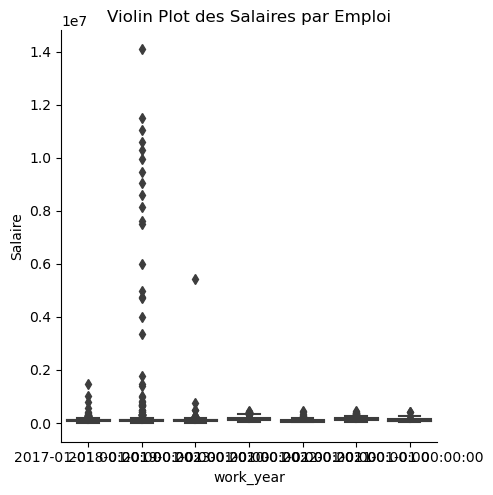

,work_year,salary_in_usd,SalaryUSD_Full_time_2017,SalaryUSD_Full_time_2018,SalaryUSD_Full_time_2019,SalaryUSD_Full_time_2020,SalaryUSD_Full_time_2021,SalaryUSD_Full_time_2022,SalaryUSD_Full_time_2023
count,14995,1.499500e+04,5.588000e+03,5.932000e+03,1.672000e+03,75.000000,215.000000,2346.000000,12294.000000
mean,2020-05-31 06:45:55.638546176,1.335468e+05,8.919556e+04,1.380367e+05,9.855024e+04,107844.346667,99120.939535,135853.011509,155697.716610
min,2017-01-01 00:00:00,0.000000e+00,4.300000e+02,5.600000e+01,2.400000e+03,15000.000000,15000.000000,15000.000000,15680.000000
25%,2018-01-01 00:00:00,8.000000e+04,6.266600e+04,6.510500e+04,6.750000e+04,48583.500000,54094.000000,99062.500000,110736.000000
50%,2022-01-01 00:00:00,1.132200e+05,8.900000e+04,9.000000e+04,9.012500e+04,91000.000000,85000.000000,134000.000000,148500.000000
75%,2023-01-01 00:00:00,1.550000e+05,1.120000e+05,1.140000e+05,1.150000e+05,122500.000000,140000.000000,172309.000000,193600.000000
max,2023-01-01 00:00:00,1.410000e+07,1.450000e+06,1.410000e+07,5.440968e+06,450000.000000,423000.000000,430967.000000,430640.000000
std,NaN,3.045409e+05,5.143053e+04,6.330723e+05,1.897970e+05,85167.270026,62903.069555,57620.878570,63483.070149


In [362]:
plt.figure(figsize=(25, 15))  # Réglez la taille du graphique si nécessaire
sns.catplot(x="work_year", y='salary_in_usd', data=data_2017_2023, kind="box")

plt.ylabel('Salaire')

# Ajoutez un titre au graphique
plt.title('Violin Plot des Salaires par Emploi')

# Affichez le graphique
plt.show()
salaryUSD_full_time_2017_2023.describe()

In [237]:
data_2017_2023.to_csv("Salary_2017_2023.csv")

In [361]:
pivot_table = salaryUSD_full_time_2017_2023.pivot_table(values=["SalaryUSD_Full_time_2017", "SalaryUSD_Full_time_2023"], index=['job_title'], aggfunc='mean')
pivot_table["rate"] = round(abs(((pivot_table["SalaryUSD_Full_time_2017"] - pivot_table["SalaryUSD_Full_time_2023" ])/ pivot_table["SalaryUSD_Full_time_2023"]) * 100))
pivot_table.to_csv("rate_salary.csv")